# **Credit Card Fraud Detection**

### By Vidula Arolkar and Ramya D R

* The objective is to build a model to predict fraudulent credit card transactions for proactive monitoring and detection. 
* To help banking sectors to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions. 
* Provided with a Kaggle dataset having 2 days data with 2,84,807 transactions, out of which 492 are fraudulent transactions

In [1]:
#importing Numpy and Pandas .
import numpy as np  
import pandas as pd

#Importing visualisation libraries: Matplotlib and Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing sklearn packages for Evaluation metrics and Preprocessing.
from sklearn import metrics
from sklearn import preprocessing

import warnings   #to avoid warnings.
warnings.filterwarnings("ignore")


## **EXPLORATORY DATA ANALYSIS**

### **LOADING THE DATA SET :**

In [2]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Basic Sanity Check on the Data :**

In [3]:
print("NO.of Records : ",df.shape[0])

print("NO.of Columns : ",df.shape[1])

df.columns

NO.of Records :  284807
NO.of Columns :  31


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#observe the different feature type present in the data
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### **Distribution of our classes**

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100 #count the non -fraud transactions
fraud_share=classes[1]/df['Class'].count()*100  #count the fraud transactions
print('Non-fraud:',normal_share)
print('Frauds:',fraud_share)

Non-fraud: 99.82725143693798
Frauds: 0.1727485630620034


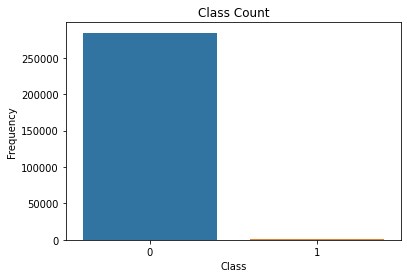

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

sns.countplot(x="Class", data= df)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

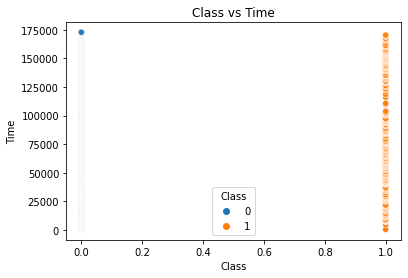

In [8]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x='Class', y='Time', data=df, hue= 'Class')
plt.title('Class vs Time')
plt.show()

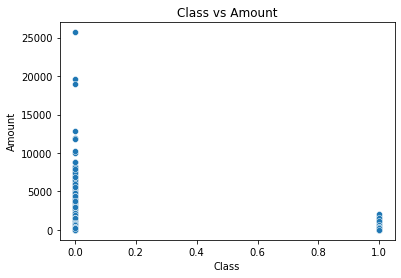

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x='Class', y='Amount', data=df)
plt.title('Class vs Amount')
plt.show()

#### ***Time variable will not be providing us any relevant information. Hence droppping it.***

In [10]:
# Drop unnecessary columns
df= df.drop('Time', axis=1)

### **CORRELATION MATRIX:**

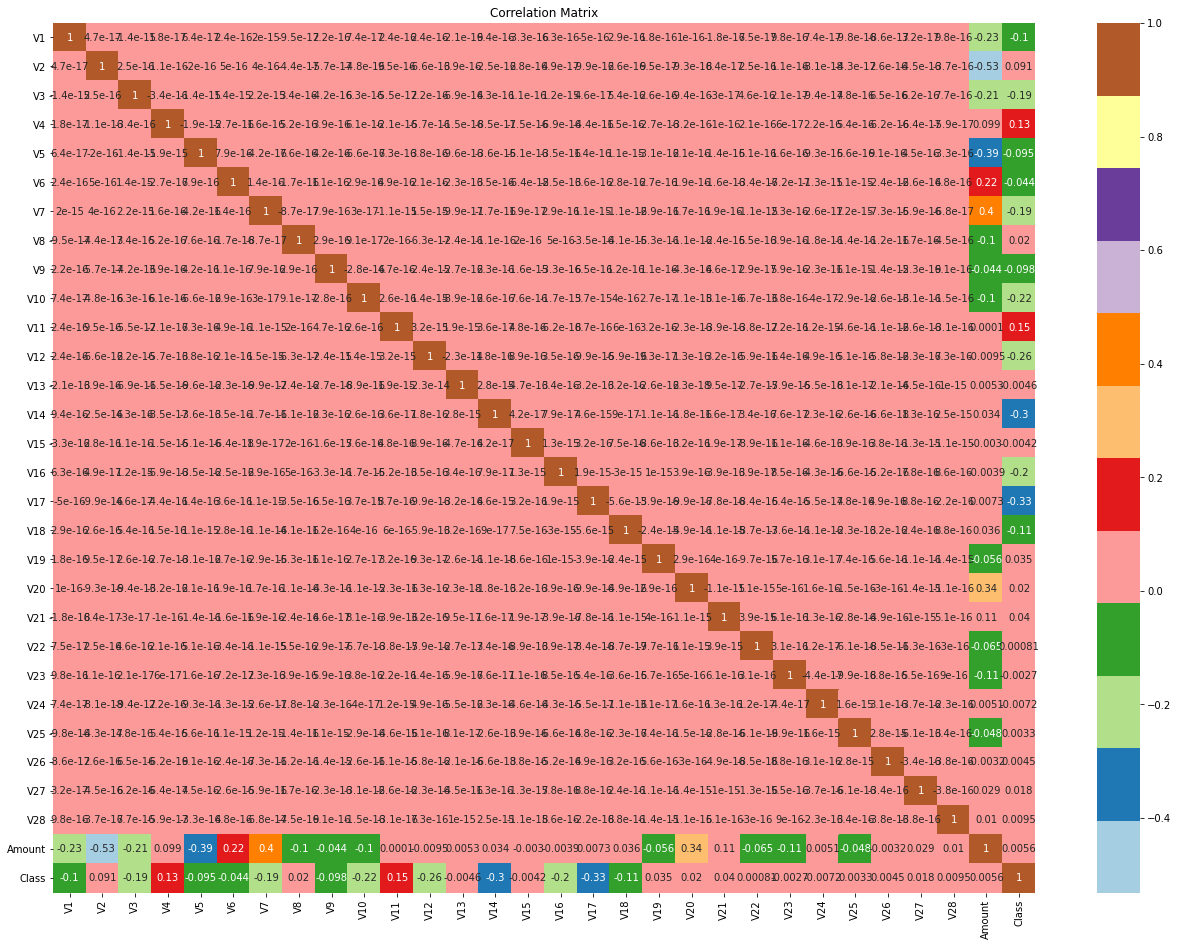

In [11]:
corr_matx = df.corr()
plt.figure(figsize=(22,16))
sns.heatmap(corr_matx, cmap="Paired", annot=True)
plt.title('Correlation Matrix')
plt.show()

### **Splitting the data into train & test data**

In [12]:
#separate the target variable from the rest of the data 

y= df['Class']   #class variable
X= df.drop('Class', axis=1)

In [13]:
#split the data into train and test set using ratio 70:30 using stratification.

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify= y, random_state =42)

##### ***Preserve X_test & y_test to evaluate on the test data once you build the model***

In [106]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### **Plotting the distribution of a variable**

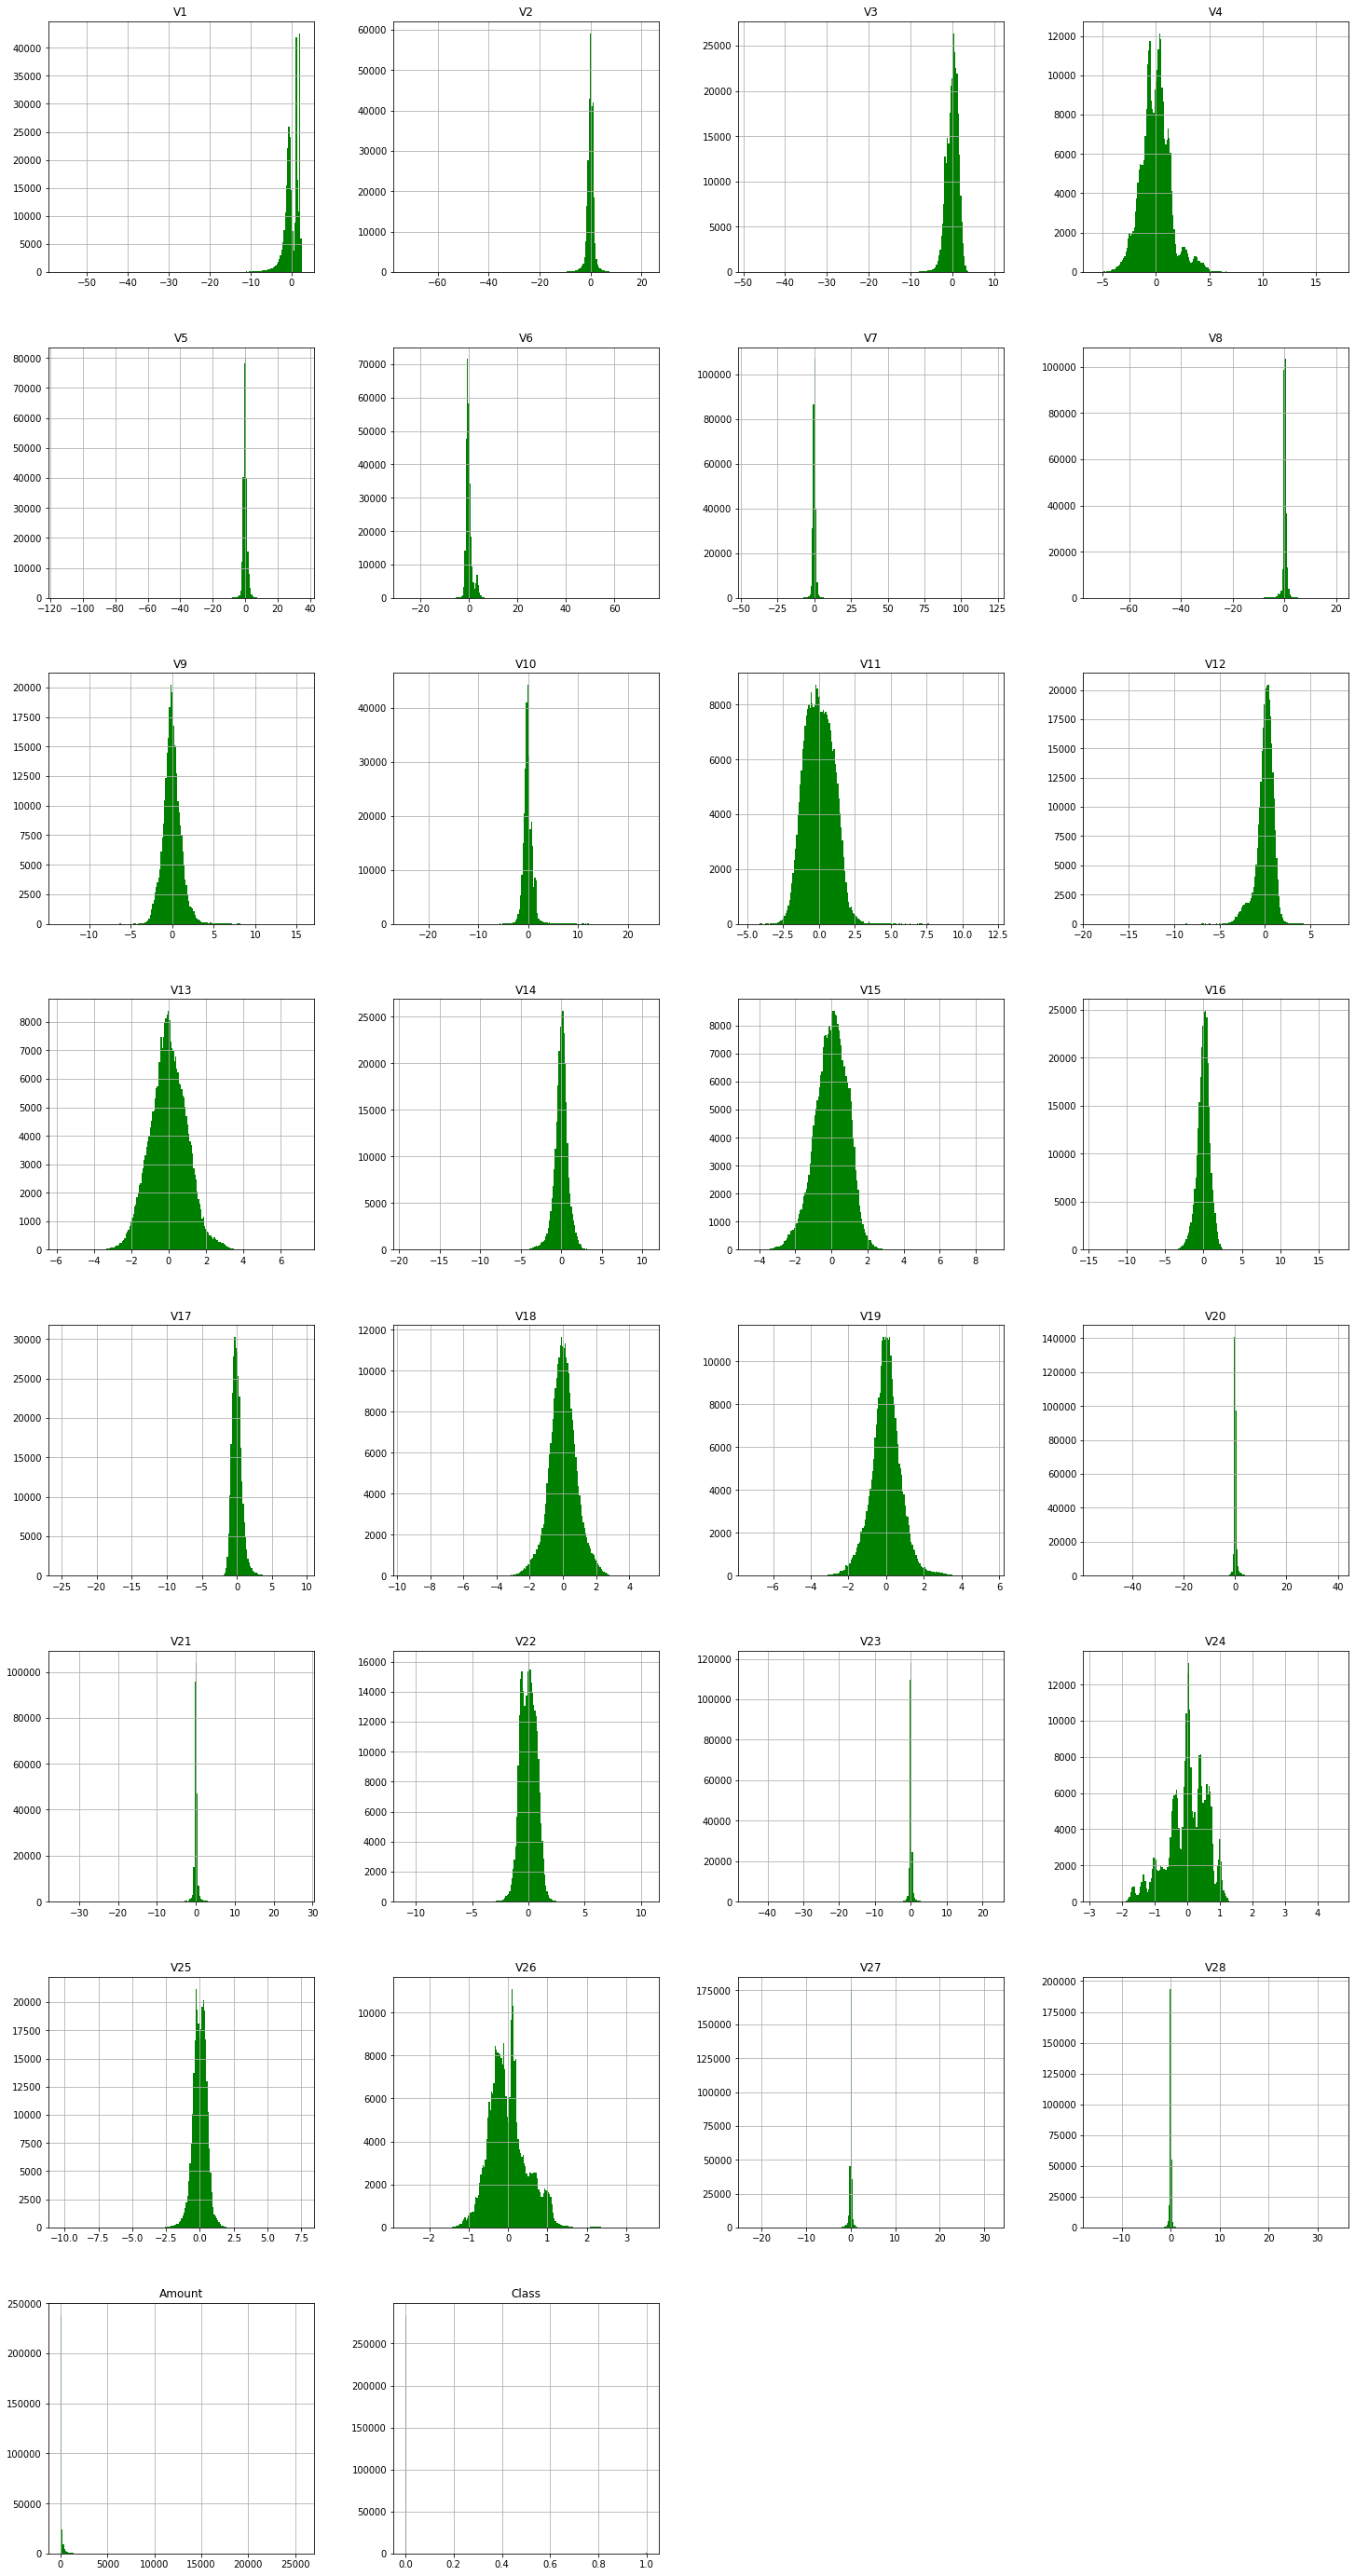

In [15]:
# plot the histogram of a variable from the dataset to see the skewness

df.hist(bins=200,color='green',figsize=(25,50),layout=(8,4))
plt.title('Distribution across each variable')
plt.show()

### ***We can see there is skewness in the some variables. Lets use Power Transformation to make the distribution Gaussian-like.***

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(copy = False)
pt.fit_transform(X_train)
pt.transform(X_test)

array([[-1.3219147 ,  1.32104187, -0.68354035, ..., -0.4448339 ,
        -0.24728806,  0.33284735],
       [-0.40195518,  0.70033947, -0.0056943 , ...,  0.34754881,
         0.42901454, -0.47190914],
       [ 0.12179853, -1.47928504, -0.83588928, ..., -0.24888141,
         0.28212126,  1.94680256],
       ...,
       [ 1.48502918, -0.64373063, -1.06687013, ..., -0.14916882,
        -0.15772833,  0.72358456],
       [ 0.71520254, -0.02015591, -0.29804278, ..., -0.11903965,
         0.02035731, -1.27117686],
       [ 1.61159573, -0.44383285, -0.90296892, ..., -0.1523038 ,
        -0.17657672, -0.16240034]])

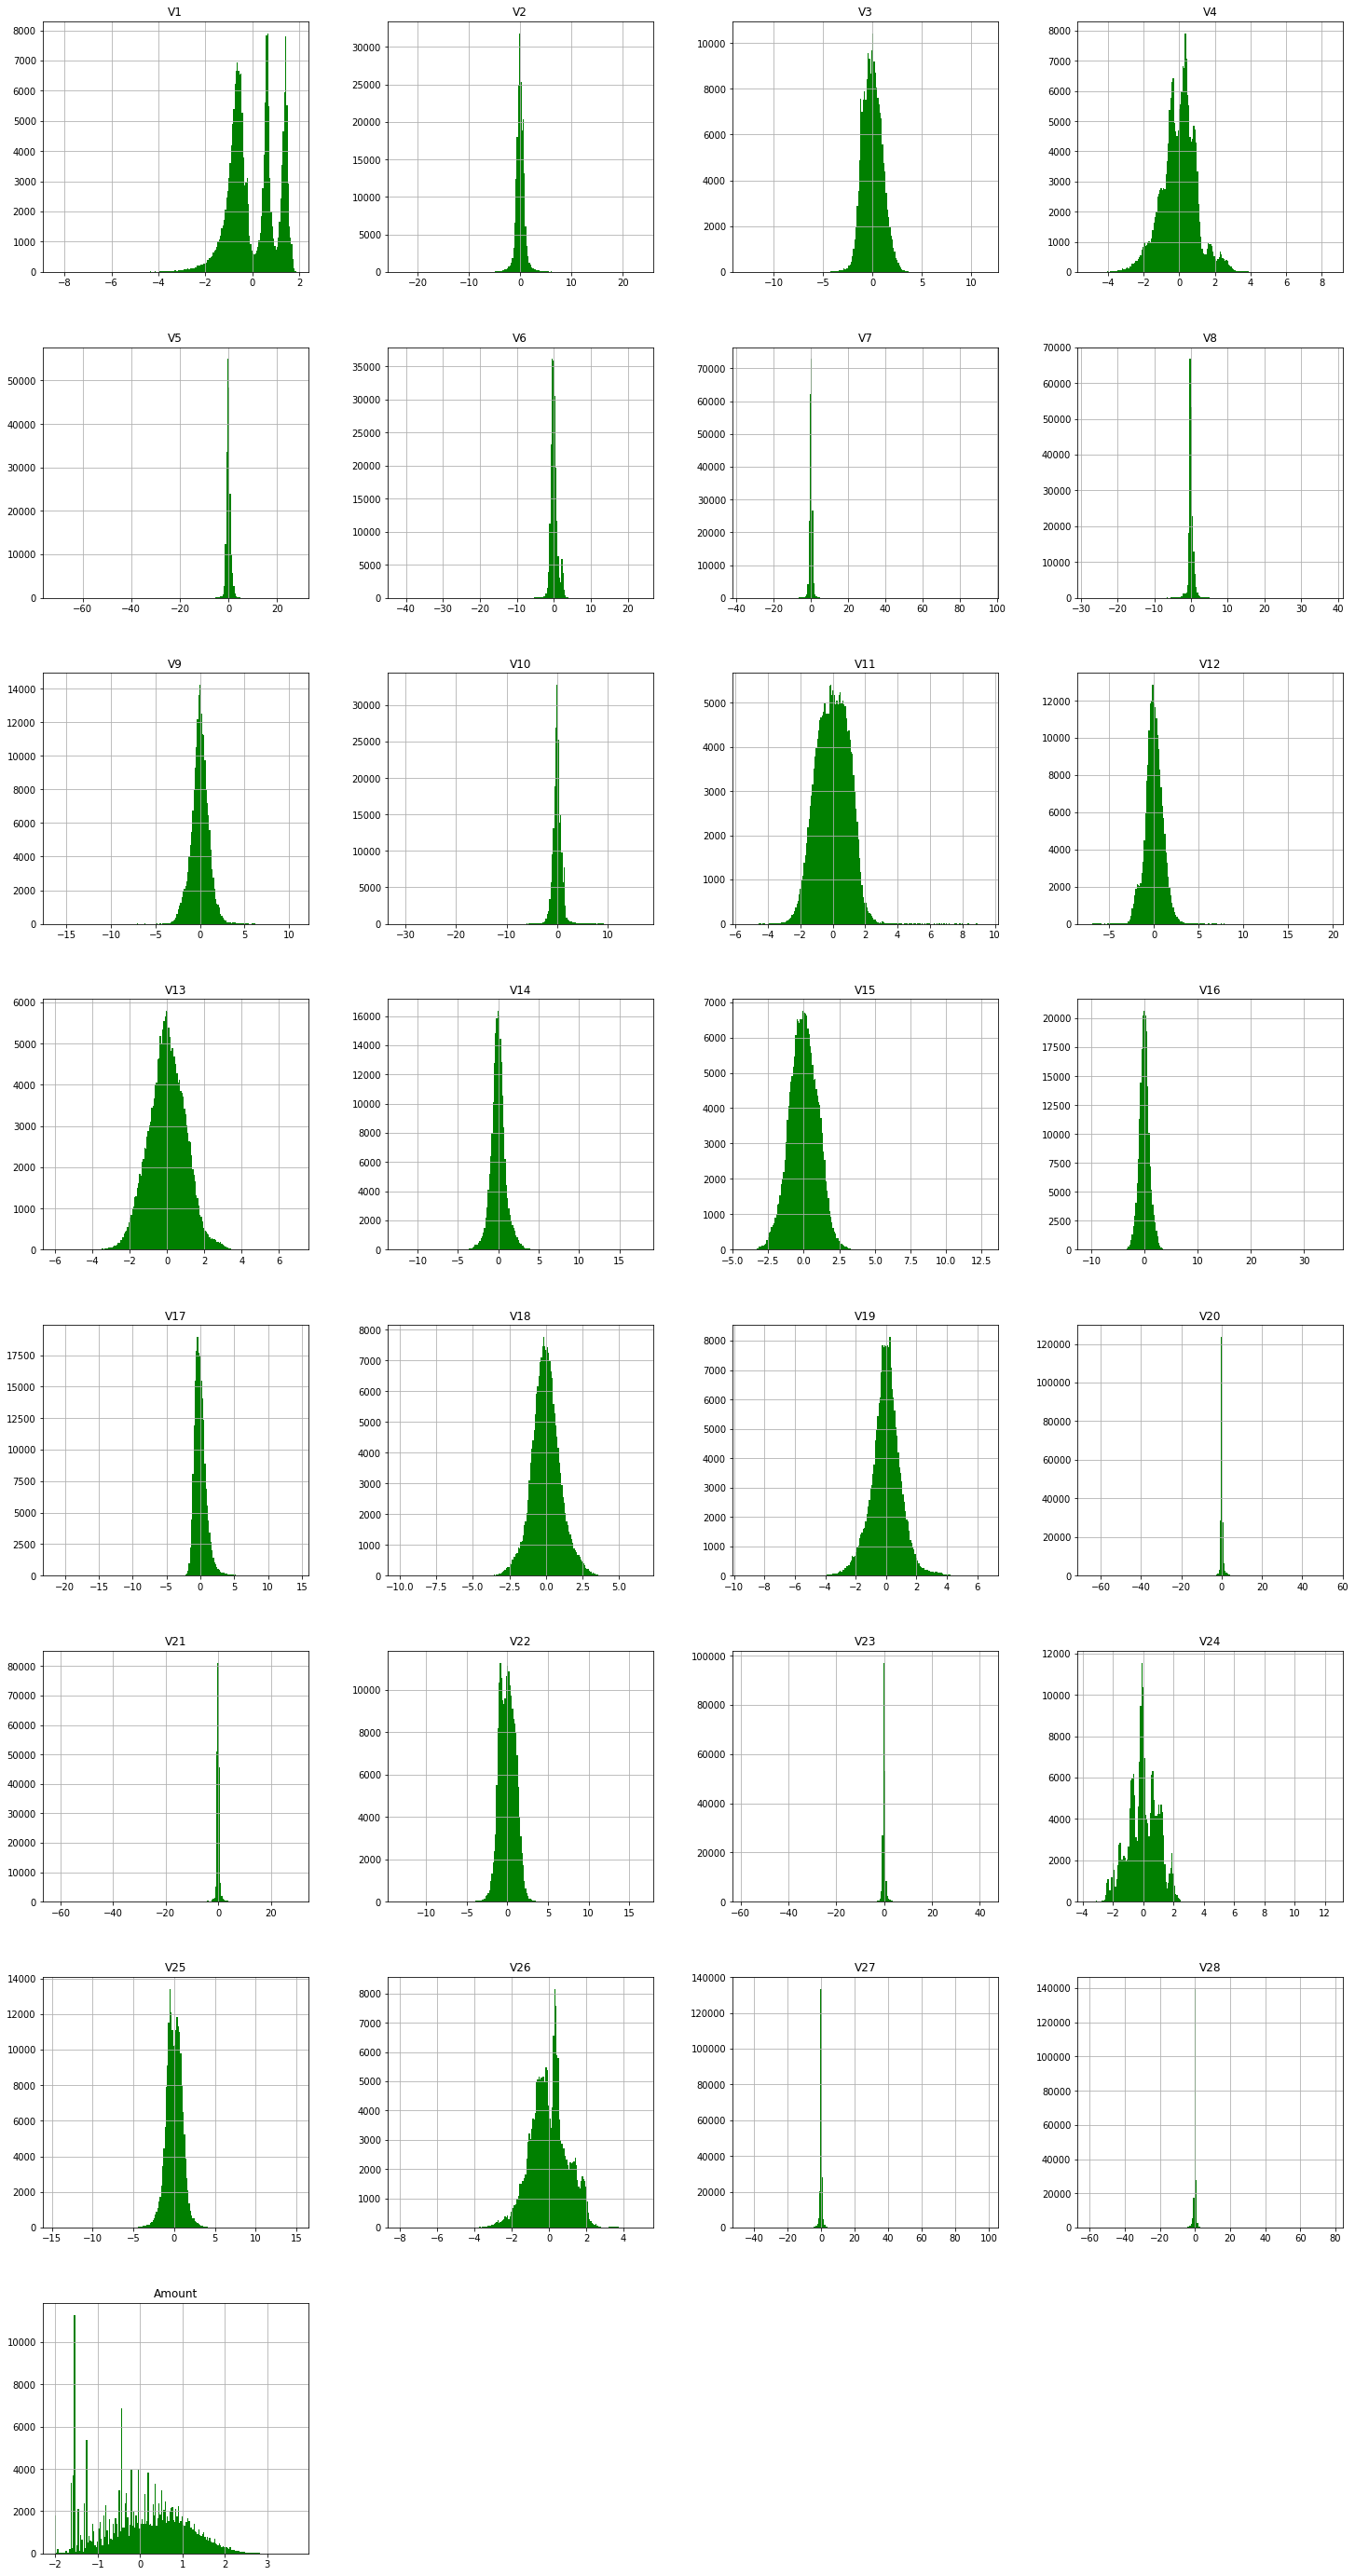

In [17]:
# plot the histogram of a variable from the dataset again to see the result 
X_train.hist(bins=200,color='green',figsize=(25,50),layout=(8,4))
plt.title('Distribution after Power Transaformation')
plt.show()

# **Model Building**
- Build different models on the imbalanced dataset and see the result

## **LOGISTIC REGRESSION USING IMBALANCED DATA**

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the logistic regression package
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, f1_score, precision_score #evaluation metrics
from sklearn.model_selection import GridSearchCV ,StratifiedKFold, RandomizedSearchCV  #importing packages for Cross validation.


In [19]:
num_C = [5,10,12,15,20,25]  #--> list of values

#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params= {'C':num_C}
lr = LogisticRegression()
lr.fit(X_train, y_train )
model_cv = GridSearchCV(estimator = lr,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   21.1s finished


0.8140836730393562
Optimum value : {'C': 5}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

Optimal Logistic Regression model:
 

In [20]:
lr= LogisticRegression(C=5) #initialise the model with optimum hyperparameters
lr.fit(X_train, y_train)

y_pred_lr_train = lr.predict(X_train)
print('Train ROC AUC score:' ,roc_auc_score(y_train, y_pred_lr_train)) 

y_pred_lr_test = lr.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_lr_test)) #print the evaluation score on the X_test by choosing the best evaluation metric


Train ROC AUC score: 0.8327810048306469
Test ROC AUC score: 0.8140836730393562


Other Evaluation Metrics:

In [21]:
#metrics evaluation on test data
acc_test = accuracy_score(y_test, y_pred_lr_test)  #accuracy 
prec_test = precision_score(y_test, y_pred_lr_test) #precision
rec_test = recall_score(y_test, y_pred_lr_test) #recall
f1_test = f1_score(y_test, y_pred_lr_test)  #f1 score
roc_auc_test = roc_auc_score(y_test, y_pred_lr_test) #ROC AUC 

#metrics evaluation on train data
acc_train = accuracy_score(y_train, y_pred_lr_train)
prec_train = precision_score(y_train, y_pred_lr_train)
rec_train = recall_score(y_train, y_pred_lr_train)
f1_train = f1_score(y_train, y_pred_lr_train)
roc_auc_train = roc_auc_score(y_train, y_pred_lr_train)

#adding all the metrics results in a datframe.
log_train = pd.DataFrame({'Method':['Logistic Regression with Imbalaced data on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
log_test = pd.DataFrame({'Method':['Logistic Regression with Imbalaced data on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
log_train = log_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_test = log_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_results = pd.concat([log_train, log_test])
log_results = log_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression with Imbalaced data on Tes...,0.999146,0.837838,0.628378,0.718147,0.814084
0,Logistic Regression with Imbalaced data on Tra...,0.999288,0.894531,0.665698,0.763333,0.832781


### Similarly explore other algorithms by building models like:
- Logistic regression
- Decision Tree
- Random Forest
- XGBoost

## **DECISION TREE USING IMBALANCED DATA :**

In [22]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'criterion': ['gini', 'entropy'],   
          'max_depth': list(range(3,8)),
          'max_features': [3,5,10]}  
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

model_cv = GridSearchCV(estimator = dt,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


0.8275561524946013
Optimum value : {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5}


Optimal Decision Tree Model:

In [23]:
dt = DecisionTreeClassifier(max_features=5, max_depth= 3, criterion= 'entropy') #initialise the model with optimum hyperparameters
dt.fit(X_train, y_train)
y_pred_dt_train = dt.predict(X_train) #check on Train data first.
print('Train ROC AUC score:' ,roc_auc_score(y_train, y_pred_dt_train))

y_pred_dt_test = dt.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_dt_test)) #print the evaluation score on the X_test by choosing the best evaluation metric
 

Train ROC AUC score: 0.7920582073088365
Test ROC AUC score: 0.7566453785985998


In [24]:
#metrics evaluation on test data
acc_test = accuracy_score(y_test, y_pred_dt_test)
prec_test = precision_score(y_test, y_pred_dt_test)
rec_test = recall_score(y_test, y_pred_dt_test)
f1_test = f1_score(y_test, y_pred_dt_test)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_test)

#metrics evaluation on train data
acc_train = accuracy_score(y_train, y_pred_dt_train)
prec_train = precision_score(y_train, y_pred_dt_train)
rec_train = recall_score(y_train, y_pred_dt_train)
f1_train = f1_score(y_train, y_pred_dt_train)
roc_auc_train = roc_auc_score(y_train, y_pred_dt_train)

#adding all the metrics results in a datframe.
dt_train = pd.DataFrame({'Method':['Decision Tree with Imbalaced data on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
dt_test = pd.DataFrame({'Method':['Decision Tree with Imbalaced data on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
dt_train = dt_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_test = dt_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_results = pd.concat([dt_train, dt_test])
dt_results = dt_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Decision Tree with Imbalaced data on Test set,0.998935,0.800000,0.513514,0.625514,0.756645
0,Decision Tree with Imbalaced data on Train set,0.999097,0.844538,0.584302,0.690722,0.792058


## **RANDOM FOREST USING IMBALANCED DATA:**

In [25]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'n_estimators': [50,100],   
          'max_depth': [3,4,5],
          'max_features': [10,15],
          }  
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(warm_start=True)
rf.fit(X_train, y_train)

model_cv = GridSearchCV(estimator = rf,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 27.1min finished


0.8681904851683268
Optimum value : {'max_depth': 5, 'max_features': 10, 'n_estimators': 100}


Optimal Random Forest Model:

In [26]:
rf = RandomForestClassifier(n_estimators= 100, max_features=10, max_depth=5,warm_start=True) #initialise the model with optimum hyperparameters

rf.fit(X_train, y_train)
y_pred_rf_train = rf.predict(X_train) 
print('Train ROC AUC score:' ,roc_auc_score(y_train, y_pred_rf_train))

y_pred_rf_test= rf.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_rf_test)) #print the evaluation score on the X_test by choosing the best evaluation metric


Train ROC AUC score: 0.9025811067252794
Test ROC AUC score: 0.8715454155134089


In [28]:
#metrics evaluation on test data
acc_test = accuracy_score(y_test, y_pred_rf_test)
prec_test = precision_score(y_test, y_pred_rf_test)
rec_test = recall_score(y_test, y_pred_rf_test)
f1_test = f1_score(y_test, y_pred_rf_test)
roc_auc_test = roc_auc_score(y_test, y_pred_rf_test)

#metrics evaluation on train data
acc_train = accuracy_score(y_train, y_pred_rf_train)
prec_train = precision_score(y_train, y_pred_rf_train)
rec_train = recall_score(y_train, y_pred_rf_train)
f1_train = f1_score(y_train, y_pred_rf_train)
roc_auc_train = roc_auc_score(y_train, y_pred_rf_train)

#adding all the metrics results in a datframe.
rf_train = pd.DataFrame({'Method':['Random Forest with Imbalaced data on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
rf_test = pd.DataFrame({'Method':['Random Forest with Imbalaced data on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
rf_train = rf_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_test = rf_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_results = pd.concat([rf_train, rf_test])
rf_results = rf_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Random Forest with Imbalaced data on Test set,0.999403,0.894309,0.743243,0.811808,0.871545
0,Random Forest with Imbalaced data on Train set,0.999594,0.951890,0.805233,0.872441,0.902581


## **XGBOOST USING IMBALANCED DATA :**

In [29]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'max_depth':[2,3,5], 
          'n_estimators':[50,100]
          } 
          
import xgboost as xgb
from xgboost import XGBClassifier  # importing XGB Classifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

model_cv = GridSearchCV(estimator = xgb_model,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.4min finished


0.8613751083283295
Optimum value : {'max_depth': 2, 'n_estimators': 100}


Optimal XGBoost Model:

In [30]:
xgb_model = XGBClassifier(max_depth=2, n_estimators=100) #initialise the model with optimum hyperparameters
xgb_model.fit(X_train, y_train)

y_pred_xgb_train = xgb_model.predict(X_train)
print('ROC AUC score:' ,roc_auc_score(y_train, y_pred_xgb_train))

y_pred_xgb_test = xgb_model.predict(X_test)
print('ROC AUC score:' ,roc_auc_score(y_test, y_pred_xgb_test)) #print the evaluation score on the X_test by choosing the best evaluation metric


ROC AUC score: 0.9098008146896538
ROC AUC score: 0.8613751083283295


In [31]:
#metrics evaluation on test data
acc_test = accuracy_score(y_test, y_pred_xgb_test)
prec_test = precision_score(y_test, y_pred_xgb_test)
rec_test = recall_score(y_test, y_pred_xgb_test)
f1_test = f1_score(y_test, y_pred_xgb_test)
roc_auc_test = roc_auc_score(y_test, y_pred_xgb_test)

#metrics evaluation on train data
acc_train = accuracy_score(y_train, y_pred_xgb_train)
prec_train = precision_score(y_train, y_pred_xgb_train)
rec_train = recall_score(y_train, y_pred_xgb_train)
f1_train = f1_score(y_train, y_pred_xgb_train)
roc_auc_train = roc_auc_score(y_train, y_pred_xgb_train)

#adding all the metrics results in a datframe.
xgb_train = pd.DataFrame({'Method':['XGBoost with Imbalaced data on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
xgb_test = pd.DataFrame({'Method':['XGBoost with Imbalaced data on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
xgb_train = xgb_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_test = xgb_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_results = pd.concat([xgb_train, xgb_test])
xgb_results = xgb_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,XGBoost with Imbalaced data on Test set,0.999298,0.849206,0.722973,0.781022,0.861375
0,XGBoost with Imbalaced data on Train set,0.999523,0.895238,0.819767,0.855842,0.909801


**Plotting the ROC -AUC Curve for all Models( Imbalanced data ):**

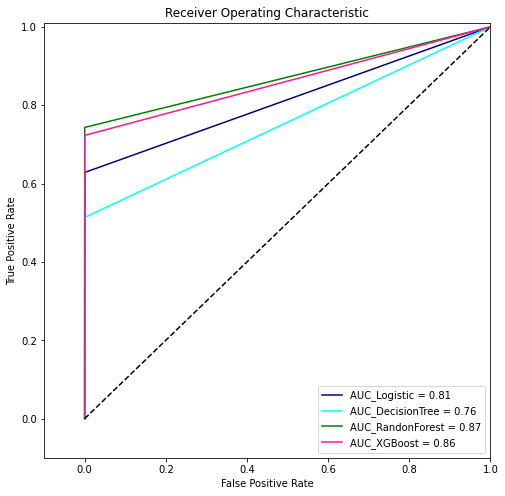

In [32]:
#impotimg ROC-AUC curve, AUC metrics
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8,8))
#calculate fpr, tpr and threshold for all models.
fpr_lr, tpr_lr,threshols_lr = roc_curve(y_test, y_pred_lr_test)
fpr_dt, tpr_dt,threshols_dt = roc_curve(y_test, y_pred_dt_test)
fpr_rf, tpr_rf,threshols_rf = roc_curve(y_test, y_pred_rf_test)
fpr_xgb, tpr_xgb,threshols_xgb = roc_curve(y_test, y_pred_xgb_test)

#calculate ROC AUC score for all models.
roc_auc_lr= auc(fpr_lr,tpr_lr)
roc_auc_dt= auc(fpr_dt,tpr_dt)
roc_auc_rf= auc(fpr_rf,tpr_rf)
roc_auc_xgb= auc(fpr_xgb,tpr_xgb)

# plot ruc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'navy',label='AUC_Logistic = %0.2f'% roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, 'aqua',label='AUC_DecisionTree = %0.2f'% roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'g',label='AUC_RandonForest = %0.2f'% roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, 'deeppink',label='AUC_XGBoost = %0.2f'% roc_auc_xgb)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### **INFERENCE : On the basis of AUC-ROC score, XGBoost is performing better on the imbalanced data.**

CONFUSION MATRIX FOR THE BEST MODEL (XGBOOST):

Text(0.5, 15.0, 'Predicted label')

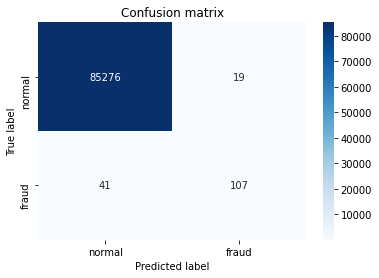

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_xgb_test)
df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')  #heatmap for confusion matrix
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


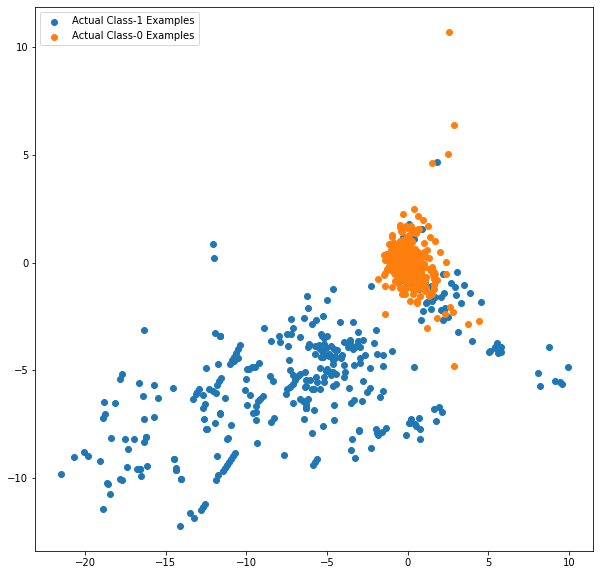

In [34]:
var_imp = []
for i in xgb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building : RANDOM OVER SAMPLING
- Build different models on the balanced dataset and see the result

### **LOGISTIC REGRESSION: (Random Over Sampling)**

In [35]:
# Logistic Regression

from imblearn.over_sampling import RandomOverSampler #importing packages
ros = RandomOverSampler(random_state=42) #random oversampling 
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train) # fit the Random oversampling object on train data


In [36]:
num_C = [0.001,0.1,1]  #--> list of values

#perform cross validation & then balance classes using Random Oversampling
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)
#perform hyperparameter tuning
params= {'C':num_C}
lr_ros = LogisticRegression()
lr_ros.fit(X_train_ros, y_train_ros )
model_cv_ros = GridSearchCV(estimator = lr_ros,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_ros.fit(X_train_ros, y_train_ros)
#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_ros.predict(X_test)
print(roc_auc_score(y_test, y_pred))
#print the optimum value of hyperparameters
print('Optimum value :', model_cv_ros.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   14.2s finished


0.9272131061831514
Optimum value : {'C': 1}


Optimal Logistic Regression Model: (Random Over Sampling)

In [37]:
lr_ros = LogisticRegression(C=1) #initialise the model with optimum hyperparameters
lr_ros.fit(X_train_ros, y_train_ros )

y_pred_train_ros= lr_ros.predict(X_train_ros)
print('Train ROC AUC score:',roc_auc_score(y_train_ros,y_pred_train_ros))

y_pred_lr_ros = lr_ros.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_lr_ros)) #print the evaluation score on the X_test by choosing the best evaluation metric


Train ROC AUC score: 0.9542558536830469
Test ROC AUC score: 0.9272131061831514


In [38]:
#metrics on test 
acc_test = accuracy_score(y_test, y_pred_lr_ros)  #accuracy 
prec_test = precision_score(y_test, y_pred_lr_ros) #precision
rec_test = recall_score(y_test, y_pred_lr_ros) #recall
f1_test = f1_score(y_test, y_pred_lr_ros)  #f1 score
roc_auc_test = roc_auc_score(y_test, y_pred_lr_ros) #ROC AUC 

#metrics on train 
acc_train = accuracy_score(y_train_ros, y_pred_train_ros)
prec_train = precision_score(y_train_ros, y_pred_train_ros)
rec_train = recall_score(y_train_ros, y_pred_train_ros)
f1_train = f1_score(y_train_ros, y_pred_train_ros)
roc_auc_train = roc_auc_score(y_train_ros, y_pred_train_ros)

#datafrane for all other metrics.
log_train = pd.DataFrame({'Method':['Logistic Regression with Random OverSampling on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
log_test = pd.DataFrame({'Method':['Logistic Regression with Random OverSampling on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
log_train = log_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_test = log_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_results = pd.concat([log_results,log_train, log_test])
log_results = log_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression with Imbalaced data on Tes...,0.999146,0.837838,0.628378,0.718147,0.814084
0,Logistic Regression with Imbalaced data on Tra...,0.999288,0.894531,0.665698,0.763333,0.832781
0,Logistic Regression with Random OverSampling o...,0.975879,0.059825,0.878378,0.112021,0.927213
0,Logistic Regression with Random OverSampling o...,0.954256,0.975226,0.932193,0.953224,0.954256


### **DECISION TREE: (Random Over Sampling)**

In [39]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = { 
          'max_depth': [3,4],
          'max_features': [3,10,20]}  
from sklearn.tree import DecisionTreeClassifier

dt_ros = DecisionTreeClassifier(random_state=1)
dt_ros.fit(X_train_ros, y_train_ros)

model_cv_dt = GridSearchCV(estimator = dt_ros,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_dt.fit(X_train_ros, y_train_ros)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_dt.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_dt.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   19.5s finished


0.9065167708889499
Optimum value : {'max_depth': 4, 'max_features': 20}


Optimal Decision Tree Model (Random Over Sampling)

In [40]:
dt_ros =  DecisionTreeClassifier(max_features = 20,max_depth= 4)  #initialise the model with optimum hyperparameters
dt_ros.fit(X_train_ros, y_train_ros )
y_pred_train_ros= dt_ros.predict(X_train_ros)
print('Train ROC AUC score:',roc_auc_score(y_train_ros,y_pred_train_ros))

y_pred_dt_ros = dt_ros.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_dt_ros)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9493141392824842
Test ROC AUC score: 0.9039670745251378


In [41]:
#metrics on test data.
acc_test = accuracy_score(y_test, y_pred_dt_ros)
prec_test = precision_score(y_test, y_pred_dt_ros)
rec_test = recall_score(y_test, y_pred_dt_ros)
f1_test = f1_score(y_test, y_pred_dt_ros)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_ros)

#metrics on train data
acc_train = accuracy_score(y_train_ros, y_pred_train_ros)
prec_train = precision_score(y_train_ros, y_pred_train_ros)
rec_train = recall_score(y_train_ros, y_pred_train_ros)
f1_train = f1_score(y_train_ros, y_pred_train_ros)
roc_auc_train = roc_auc_score(y_train_ros, y_pred_train_ros)

#dataframe for all others metrics.
dt_train = pd.DataFrame({'Method':['Decision Tree with Random OverSampling on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
dt_test = pd.DataFrame({'Method':['Decision Tree with Random OverSampling on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
dt_train = dt_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_test = dt_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_results = pd.concat([dt_results, dt_train, dt_test])
dt_results = dt_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Decision Tree with Imbalaced data on Test set,0.998935,0.800000,0.513514,0.625514,0.756645
0,Decision Tree with Imbalaced data on Train set,0.999097,0.844538,0.584302,0.690722,0.792058
0,Decision Tree with Random OverSampling on Test...,0.983334,0.080263,0.824324,0.146283,0.903967
0,Decision Tree with Random OverSampling on Trai...,0.949314,0.983091,0.914355,0.947478,0.949314


### **RANDOM FOREST: (Random Over Sampling)**

In [42]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'n_estimators': [50,100],  
          'max_depth': [3,4],
          'max_features': [10,15]
          }  
from sklearn.ensemble import RandomForestClassifier  #randomforest classifier

rf_ros = RandomForestClassifier(warm_start=True)
rf_ros.fit(X_train_ros, y_train_ros)

model_cv_rf = GridSearchCV(estimator = rf_ros,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_rf.fit(X_train_ros, y_train_ros)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_rf.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_rf.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 22.3min finished


0.9132484952858363
Optimum value : {'max_depth': 4, 'max_features': 15, 'n_estimators': 50}


Optimal Random Forest Model (Random Over Sampling)

In [43]:
rf_ros = RandomForestClassifier(n_estimators= 100 , max_features= 15, max_depth= 4,warm_start=True) #initialise the model with optimum hyperparameters
rf_ros.fit(X_train_ros, y_train_ros)

y_pred_train_ros= rf_ros.predict(X_train_ros)
print('Train ROC AUC score:',roc_auc_score(y_train_ros,y_pred_train_ros))

y_pred_rf_ros = rf_ros.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_rf_ros)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9611521455130138
Test ROC AUC score: 0.916773423872316


In [44]:
#metrics on test data 
acc_test = accuracy_score(y_test, y_pred_rf_ros)
prec_test = precision_score(y_test, y_pred_rf_ros)
rec_test = recall_score(y_test, y_pred_rf_ros)
f1_test = f1_score(y_test, y_pred_rf_ros)
roc_auc_test = roc_auc_score(y_test, y_pred_rf_ros)

#metrics on train data
acc_train = accuracy_score(y_train_ros, y_pred_train_ros)
prec_train = precision_score(y_train_ros, y_pred_train_ros)
rec_train = recall_score(y_train_ros, y_pred_train_ros)
f1_train = f1_score(y_train_ros, y_pred_train_ros)
roc_auc_train = roc_auc_score(y_train_ros, y_pred_train_ros)

#dataframe for all metrics:
rf_train = pd.DataFrame({'Method':['Random Forest with Random OverSampling on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
rf_test = pd.DataFrame({'Method':['Random Forest with Random OverSampling on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
rf_train = rf_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_test = rf_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_results = pd.concat([rf_results , rf_train, rf_test])
rf_results = rf_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Random Forest with Imbalaced data on Test set,0.999403,0.894309,0.743243,0.811808,0.871545
0,Random Forest with Imbalaced data on Train set,0.999594,0.951890,0.805233,0.872441,0.902581
0,Random Forest with Random OverSampling on Test...,0.995436,0.253061,0.837838,0.388715,0.916773
0,Random Forest with Random OverSampling on Trai...,0.961152,0.995867,0.926148,0.959743,0.961152


### **XGBOOST (Random Over Sampling):**

In [45]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'max_depth':[2,3], 
          'n_estimators':[10,50]
          } 
          
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model_ros = XGBClassifier(max_depth=2)
xgb_model_ros.fit(X_train_ros, y_train_ros)

model_cv_xgb = GridSearchCV(estimator = xgb_model_ros,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_xgb.fit(X_train_ros, y_train_ros)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_xgb.predict(X_test.values)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_xgb.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.3min finished


0.927631447615034
Optimum value : {'max_depth': 3, 'n_estimators': 50}


Optimal XGBoost Model:(Random Over Sampling)

In [46]:
xgb_model_ros = XGBClassifier(max_depth=3, n_estimators=50) #initialise the model with optimum hyperparameters
xgb_model_ros.fit(X_train_ros, y_train_ros)


y_pred_train_ros= xgb_model_ros.predict(X_train_ros)
print('Train ROC AUC score:',roc_auc_score(y_train_ros,y_pred_train_ros))

y_pred_xgb_ros = xgb_model_ros.predict(X_test.values)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_xgb_ros)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9791980705456738
Test ROC AUC score: 0.927631447615034


In [47]:
#metrics on test data 
acc_test = accuracy_score(y_test, y_pred_xgb_ros)
prec_test = precision_score(y_test, y_pred_xgb_ros)
rec_test = recall_score(y_test, y_pred_xgb_ros)
f1_test = f1_score(y_test, y_pred_xgb_ros)
roc_auc_test = roc_auc_score(y_test, y_pred_xgb_ros)

#metrics on train data
acc_train = accuracy_score(y_train_ros, y_pred_train_ros)
prec_train = precision_score(y_train_ros, y_pred_train_ros)
rec_train = recall_score(y_train_ros, y_pred_train_ros)
f1_train = f1_score(y_train_ros, y_pred_train_ros)
roc_auc_train = roc_auc_score(y_train_ros, y_pred_train_ros)

#dataframe for all metrics:
xgb_train = pd.DataFrame({'Method':['XGBoost with Random OverSampling on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
xgb_test = pd.DataFrame({'Method':['XGBoost with Random OverSampling on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
xgb_train = xgb_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_test = xgb_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_results = pd.concat([xgb_results,xgb_train, xgb_test])
xgb_results = xgb_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,XGBoost with Imbalaced data on Test set,0.999298,0.849206,0.722973,0.781022,0.861375
0,XGBoost with Imbalaced data on Train set,0.999523,0.895238,0.819767,0.855842,0.909801
0,XGBoost with Random OverSampling on Test set,0.990181,0.135164,0.864865,0.233790,0.927631
0,XGBoost with Random OverSampling on Train set,0.979198,0.990768,0.967410,0.978950,0.979198


**Plotting ROC-AUC curve for all Model (Random Over Sampling):**

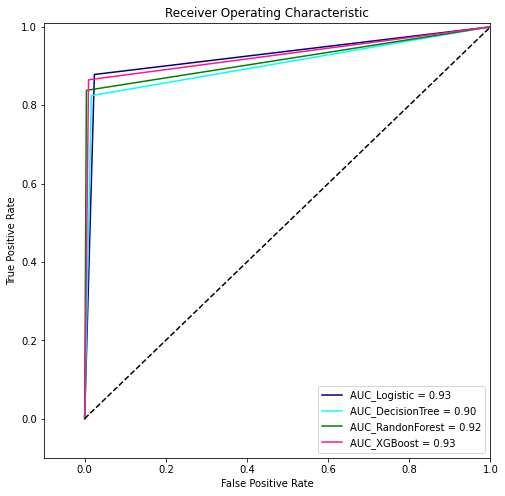

In [48]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8,8))
#calculate fpr, tpr , threshold for all models
fpr_lr, tpr_lr,threshols_lr = roc_curve(y_test, y_pred_lr_ros)
fpr_dt, tpr_dt,threshols_dt = roc_curve(y_test, y_pred_dt_ros)
fpr_rf, tpr_rf,threshols_rf = roc_curve(y_test, y_pred_rf_ros)
fpr_xgb, tpr_xgb,threshols_xgb = roc_curve(y_test, y_pred_xgb_ros)

#calculate ROC AUC for all models
roc_auc_lr= auc(fpr_lr,tpr_lr)
roc_auc_dt= auc(fpr_dt,tpr_dt)
roc_auc_rf= auc(fpr_rf,tpr_rf)
roc_auc_xgb= auc(fpr_xgb,tpr_xgb)

# plot ruc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'navy',label='AUC_Logistic = %0.2f'% roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, 'aqua',label='AUC_DecisionTree = %0.2f'% roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'g',label='AUC_RandonForest = %0.2f'% roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, 'deeppink',label='AUC_XGBoost = %0.2f'% roc_auc_xgb)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **INFERENCE : From the above ROC-AUC scores of al the Models, XGBoost is performing better again.**

Confusion Matrix for the Best Model : XGBoost

Text(0.5, 15.0, 'Predicted label')

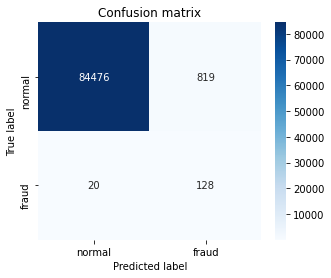

In [49]:
plt.rcParams['figure.figsize'] = [5,4]

cm=confusion_matrix(y_test,y_pred_xgb_ros) 
df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Top var = 14
2nd Top var = 10
3rd Top var = 4


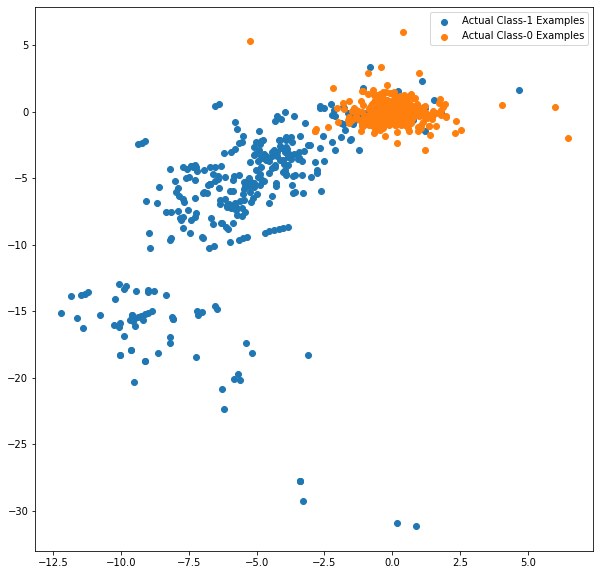

In [50]:
var_imp = []
for i in xgb_model_ros.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# **Model Building : SMOTE**
- Build different models on the balanced dataset and see the result

### Print the class distribution after applying SMOTE 

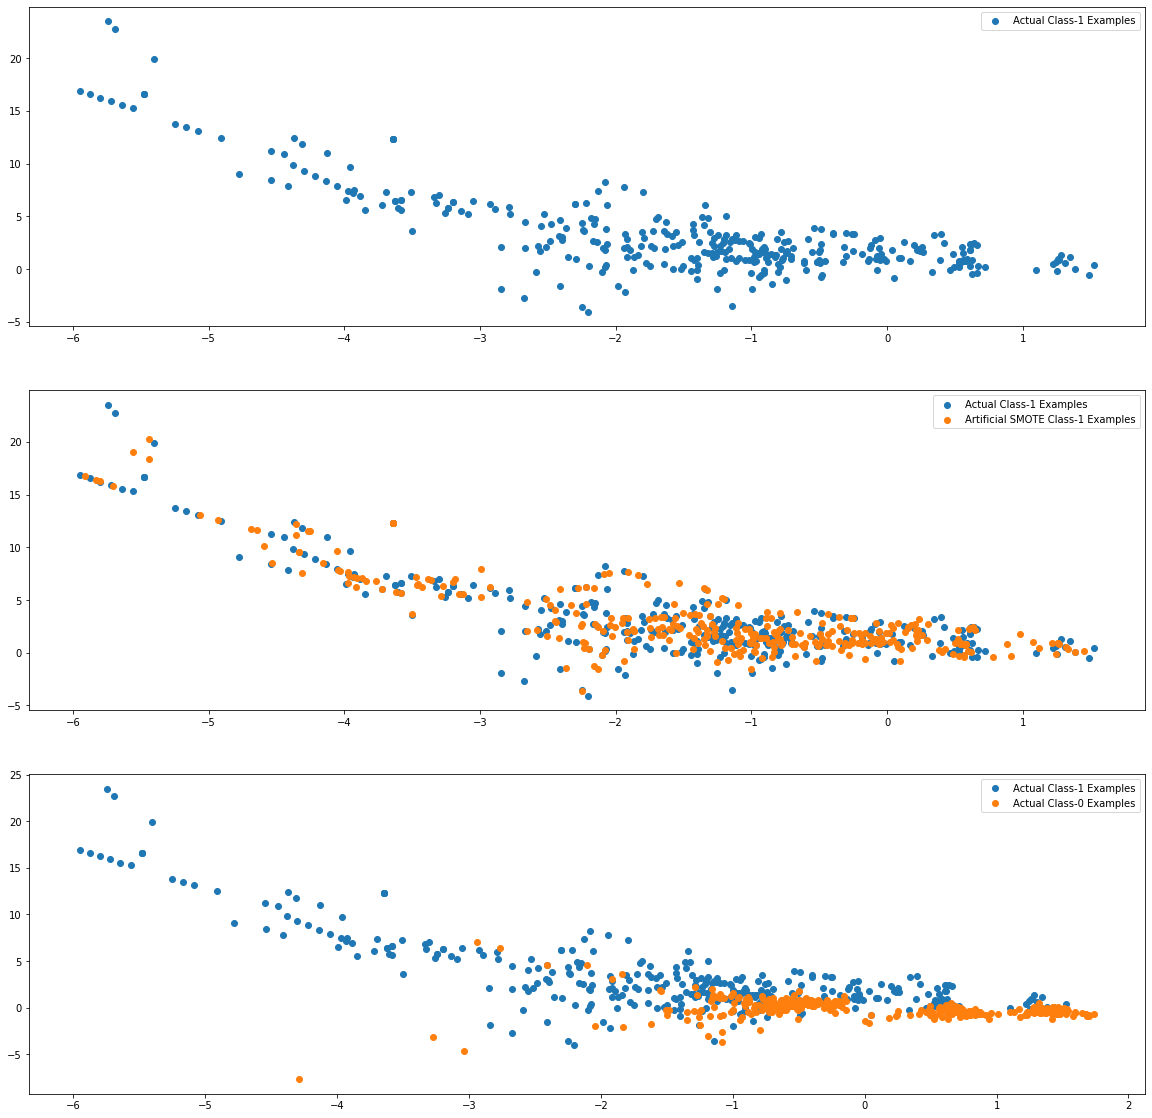

In [51]:
from imblearn import  over_sampling
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### **LOGISTIC REGRESSION USING SMOTE:**

In [52]:
num_C = [5,10,12,15]  #--> list of values

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params= {'C':num_C}
lr_smote = LogisticRegression()
lr_smote.fit(X_train_smote, y_train_smote )
model_cv_smote = GridSearchCV(estimator = lr_smote,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_smote.fit(X_train_smote, y_train_smote) 

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_smote.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_smote.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   19.5s finished


0.926615181334098
Optimum value : {'C': 15}


Optimal Logistic Regression Model (SMOTE)

In [53]:
lr_smote = LogisticRegression(C=15) #initialise the model with optimum hyperparameters
lr_smote.fit(X_train_smote, y_train_smote )

y_pred_train_smote= lr_smote.predict(X_train_smote)
print('Train ROC AUC score:',roc_auc_score(y_train_smote,y_pred_train_smote))

y_pred_lr_smote = lr_smote.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_lr_smote)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9576901818912672
Test ROC AUC score: 0.926615181334098


In [54]:
#metrics on test data 
acc_test = accuracy_score(y_test, y_pred_lr_smote)  #accuracy 
prec_test = precision_score(y_test, y_pred_lr_smote) #precision
rec_test = recall_score(y_test, y_pred_lr_smote) #recall
f1_test = f1_score(y_test, y_pred_lr_smote)  #f1 score
roc_auc_test = roc_auc_score(y_test, y_pred_lr_smote) #ROC AUC 


#metrics on train data
acc_train = accuracy_score(y_train_smote, y_pred_train_smote)
prec_train = precision_score(y_train_smote, y_pred_train_smote)
rec_train = recall_score(y_train_smote, y_pred_train_smote)
f1_train = f1_score(y_train_smote, y_pred_train_smote)
roc_auc_train = roc_auc_score(y_train_smote, y_pred_train_smote)

#dataframe for all metrics:
log_train = pd.DataFrame({'Method':['Logistic Regression with SMOTE on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
log_test = pd.DataFrame({'Method':['Logistic Regression with SMOTE on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
log_train = log_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_test = log_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_results = pd.concat([log_results,log_train, log_test])
log_results = log_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression with Imbalaced data on Tes...,0.999146,0.837838,0.628378,0.718147,0.814084
0,Logistic Regression with Imbalaced data on Tra...,0.999288,0.894531,0.665698,0.763333,0.832781
0,Logistic Regression with Random OverSampling o...,0.975879,0.059825,0.878378,0.112021,0.927213
0,Logistic Regression with Random OverSampling o...,0.954256,0.975226,0.932193,0.953224,0.954256
0,Logistic Regression with SMOTE on Test set,0.974685,0.057143,0.878378,0.107305,0.926615
0,Logistic Regression with SMOTE on Train set,0.957690,0.974427,0.940051,0.956930,0.957690


### **DECISION TREE USING SMOTE:**

In [68]:
from sklearn.model_selection import GridSearchCV ,StratifiedKFold, RandomizedSearchCV
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = { 
          'max_depth': [3,4],
          'max_features': [3,10,15]}  
from sklearn.tree import DecisionTreeClassifier

dt_smote = DecisionTreeClassifier(random_state=1)
dt_smote.fit(X_train_smote, y_train_smote)

modelcv_dtsm = GridSearchCV(estimator = dt_smote,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
modelcv_dtsm.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric
y_pred = modelcv_dtsm.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', modelcv_dtsm.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.1s finished


0.9049145810327591
Optimum value : {'max_depth': 4, 'max_features': 10}


Optimal Decision Tree Model (SMOTE):

In [69]:
dt_smote =  DecisionTreeClassifier(max_features = 10,max_depth= 4, random_state=1)  #initialise the model with optimum hyperparameters
dt_smote.fit(X_train_smote, y_train_smote )
y_pred_train_smote= dt_smote.predict(X_train_smote)
print('Train ROC AUC score:',roc_auc_score(y_train_smote,y_pred_train_smote))

y_pred_dt_smote = dt_smote.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_dt_smote)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9452467088734801
Test ROC AUC score: 0.9049145810327591


In [70]:
#metrics on test data 
acc_test = accuracy_score(y_test, y_pred_dt_smote)
prec_test = precision_score(y_test, y_pred_dt_smote)
rec_test = recall_score(y_test, y_pred_dt_smote)
f1_test = f1_score(y_test, y_pred_dt_smote)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_smote)

#metrics on train data
acc_train = accuracy_score(y_train_smote, y_pred_train_smote)
prec_train = precision_score(y_train_smote, y_pred_train_smote)
rec_train = recall_score(y_train_smote, y_pred_train_smote)
f1_train = f1_score(y_train_smote, y_pred_train_smote)
roc_auc_train = roc_auc_score(y_train_smote, y_pred_train_smote)

#dataframe for all metrics:
dt_train = pd.DataFrame({'Method':['Decision Tree with SMOTE on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
dt_test = pd.DataFrame({'Method':['Decision Tree with SMOTE on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
dt_train = dt_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_test = dt_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_results = pd.concat([dt_results,dt_train, dt_test])
dt_results = dt_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Decision Tree with Imbalaced data on Test set,0.998935,0.800000,0.513514,0.625514,0.756645
0,Decision Tree with Imbalaced data on Train set,0.999097,0.844538,0.584302,0.690722,0.792058
0,Decision Tree with Random OverSampling on Test...,0.983334,0.080263,0.824324,0.146283,0.903967
0,Decision Tree with Random OverSampling on Trai...,0.949314,0.983091,0.914355,0.947478,0.949314
0,Decision Tree with SMOTE on Test set,0.971759,0.049343,0.837838,0.093198,0.904915
0,Decision Tree with SMOTE on Train set,0.945247,0.971095,0.917812,0.943702,0.945247
0,Decision Tree with SMOTE on Test set,0.971759,0.049343,0.837838,0.093198,0.904915
0,Decision Tree with SMOTE on Train set,0.945247,0.971095,0.917812,0.943702,0.945247


### **RANDOM FOREST USING SMOTE:**

In [58]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'n_estimators': [50,100],  
          'max_depth': [2,3],
          'max_features': [10,15]
          }  
from sklearn.ensemble import RandomForestClassifier

rf_smote = RandomForestClassifier(warm_start=True)
rf_smote.fit(X_train_smote, y_train_smote)

model_cv_rfsm = GridSearchCV(estimator = rf_smote,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_rfsm.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_rfsm.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_rfsm.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 24.1min finished


0.9226586029725136
Optimum value : {'max_depth': 3, 'max_features': 15, 'n_estimators': 50}


Optimal Random Forest Model (SMOTE):

In [59]:
rf_smote = RandomForestClassifier(n_estimators= 100 , max_features= 15, max_depth= 3,warm_start=True) #initialise the model with optimum hyperparameters
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_train_smote= rf_smote.predict(X_train_smote)
print('Train ROC AUC score:',roc_auc_score(y_train_smote,y_pred_train_smote))

y_pred_rf_smote = rf_smote.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_rf_smote)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.944942719324691
Test ROC AUC score: 0.9190516062694971


In [60]:
#metrics on test data 
acc_test = accuracy_score(y_test, y_pred_rf_smote)
prec_test = precision_score(y_test, y_pred_rf_smote)
rec_test = recall_score(y_test, y_pred_rf_smote)
f1_test = f1_score(y_test, y_pred_rf_smote)
roc_auc_test = roc_auc_score(y_test, y_pred_rf_smote)


#metrics on train data
acc_train = accuracy_score(y_train_smote, y_pred_train_smote)
prec_train = precision_score(y_train_smote, y_pred_train_smote)
rec_train = recall_score(y_train_smote, y_pred_train_smote)
f1_train = f1_score(y_train_smote, y_pred_train_smote)
roc_auc_train = roc_auc_score(y_train_smote, y_pred_train_smote)

#dataframe for all metrics:
rf_train = pd.DataFrame({'Method':['Random Forest with SMOTE on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
rf_test = pd.DataFrame({'Method':['Random Forest with SMOTE on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
rf_train = rf_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_test = rf_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_results = pd.concat([rf_results,rf_train, rf_test])
rf_results = rf_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Random Forest with Imbalaced data on Test set,0.999403,0.894309,0.743243,0.811808,0.871545
0,Random Forest with Imbalaced data on Train set,0.999594,0.951890,0.805233,0.872441,0.902581
0,Random Forest with Random OverSampling on Test...,0.995436,0.253061,0.837838,0.388715,0.916773
0,Random Forest with Random OverSampling on Trai...,0.961152,0.995867,0.926148,0.959743,0.961152
0,Random Forest with SMOTE on Test set,0.986517,0.100318,0.851351,0.179487,0.919052
0,Random Forest with SMOTE on Train set,0.944943,0.986314,0.902407,0.942497,0.944943


### **XGBOOST USING SMOTE:**

In [107]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'max_depth':[2,3], 
          'n_estimators':[20,50]} 
          
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model_smote = XGBClassifier(max_depth=2)
xgb_model_smote.fit(X_train_smote, y_train_smote)

model_cv_xgbsm = GridSearchCV(estimator = xgb_model_smote,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_xgbsm.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_xgbsm.predict(X_test.values)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_xgbsm.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.3min finished


0.9273284847659077
Optimum value : {'max_depth': 3, 'n_estimators': 50}


Optimal XGBoost Model (SMOTE):

In [108]:
xgb_model_smote = XGBClassifier(max_depth=3,n_estimators=50,objective = 'binary:logistic' ) #initialise the model with optimum hyperparameters
xgb_model_smote.fit(X_train_smote, y_train_smote)


y_pred_train_smote= xgb_model_smote.predict(X_train_smote)
print('Train ROC AUC score:',roc_auc_score(y_train_smote,y_pred_train_smote))

y_pred_xgb_smote = xgb_model_smote.predict(X_test.values)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_xgb_smote)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9660486383278062
Test ROC AUC score: 0.9273284847659077


In [109]:
#metrics on test data 
acc_test = accuracy_score(y_test, y_pred_xgb_smote)
prec_test = precision_score(y_test, y_pred_xgb_smote)
rec_test = recall_score(y_test, y_pred_xgb_smote)
f1_test = f1_score(y_test, y_pred_xgb_smote)
roc_auc_test = roc_auc_score(y_test, y_pred_xgb_smote)

#metrics on train data
acc_train = accuracy_score(y_train_smote, y_pred_train_smote)
prec_train = precision_score(y_train_smote, y_pred_train_smote)
rec_train = recall_score(y_train_smote, y_pred_train_smote)
f1_train = f1_score(y_train_smote, y_pred_train_smote)
roc_auc_train = roc_auc_score(y_train_smote, y_pred_train_smote)

#dataframe for all metrics:
xgb_train = pd.DataFrame({'Method':['XGBoost with SMOTE on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
xgb_test = pd.DataFrame({'Method':['XGBoost with SMOTE on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
xgb_train = xgb_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_test = xgb_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_results = pd.concat([xgb_results,xgb_train, xgb_test])
xgb_results = xgb_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,XGBoost with Imbalaced data on Test set,0.999298,0.849206,0.722973,0.781022,0.861375
0,XGBoost with Imbalaced data on Train set,0.999523,0.895238,0.819767,0.855842,0.909801
0,XGBoost with Random OverSampling on Test set,0.990181,0.135164,0.864865,0.233790,0.927631
0,XGBoost with Random OverSampling on Train set,0.979198,0.990768,0.967410,0.978950,0.979198
0,XGBoost with SMOTE on Test set,0.982842,0.081853,0.871622,0.149652,0.927328
0,XGBoost with SMOTE on Train set,0.966049,0.982390,0.949111,0.965464,0.966049
0,XGBoost with ADASYN on Test set,0.950739,0.030303,0.885135,0.058600,0.917994
0,XGBoost with ADASYN on Train set,0.959455,0.952129,0.967557,0.959781,0.959454
0,XGBoost with SMOTE on Test set,0.982842,0.081853,0.871622,0.149652,0.927328
0,XGBoost with SMOTE on Train set,0.966049,0.982390,0.949111,0.965464,0.966049


**Plotting the ROC-AUC curve for all models (SMOTE):**

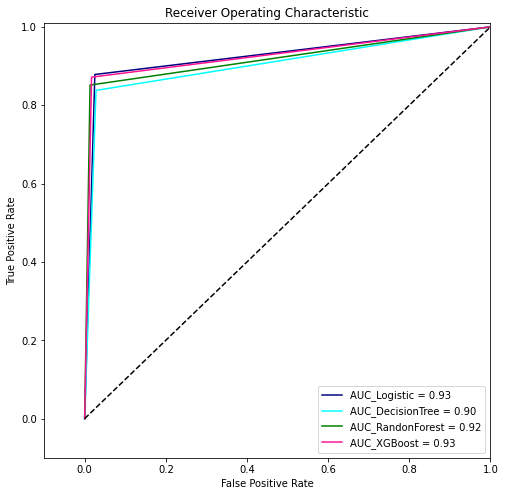

In [110]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8,8))
#calculate frp, trp, threshold for all models:
fpr_lr, tpr_lr,threshols_lr = roc_curve(y_test, y_pred_lr_smote)
fpr_dt, tpr_dt,threshols_dt = roc_curve(y_test, y_pred_dt_smote)
fpr_rf, tpr_rf,threshols_rf = roc_curve(y_test, y_pred_rf_smote)
fpr_xgb, tpr_xgb,threshols_xgb = roc_curve(y_test, y_pred_xgb_smote)

#calculate AUC ROC score for all models
roc_auc_lr= auc(fpr_lr,tpr_lr)
roc_auc_dt= auc(fpr_dt,tpr_dt)
roc_auc_rf= auc(fpr_rf,tpr_rf)
roc_auc_xgb= auc(fpr_xgb,tpr_xgb)

# plot ruc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'navy',label='AUC_Logistic = %0.2f'% roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, 'aqua',label='AUC_DecisionTree = %0.2f'% roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'g',label='AUC_RandonForest = %0.2f'% roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, 'deeppink',label='AUC_XGBoost = %0.2f'% roc_auc_xgb)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **INFERENCE : From the above ROC-AUC scores of al the Models, XGBoost is performing better again.**

CONFUSION MATRIX FOR THE BEST MODEL: (XGBOOST)

Text(0.5, 15.0, 'Predicted label')

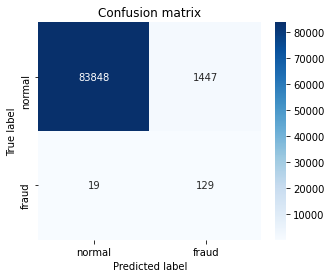

In [111]:
plt.rcParams['figure.figsize'] = [5,4]

cm=confusion_matrix(y_test,y_pred_xgb_smote)
df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Top var = 14
2nd Top var = 10
3rd Top var = 4


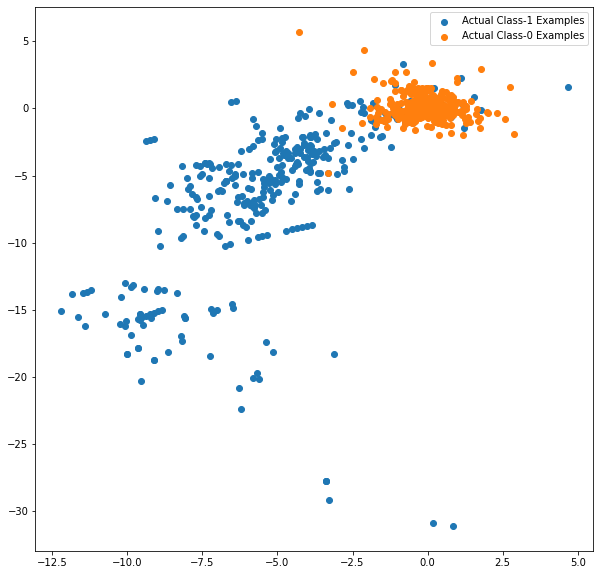

In [112]:
var_imp = []
for i in xgb_model_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model Building : ADASYN
- Build different models on the balanced dataset and see the result

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### **LOGISTIC REGRESSION USING ADASYN:**

In [71]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=42)
num_C = [0.001,1,2,5]

#perform hyperparameter tuning
params= {'C':num_C}
lr_ada = LogisticRegression()
lr_ada.fit(X_train_adasyn, y_train_adasyn)

model_cv_ada = GridSearchCV(estimator = lr_ada,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_ada.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
y_pred_ada = model_cv_ada.predict(X_test)
print(roc_auc_score(y_test, y_pred_ada))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_ada.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   15.8s finished


0.9134682809898238
Optimum value : {'C': 5}


Optimal Logistic Regression (ADASYN):

In [72]:
lr_ada = LogisticRegression(C=5) #initialise the model with optimum hyperparameters
lr_ada.fit(X_train_adasyn, y_train_adasyn )

y_pred_train_ada= lr_ada.predict(X_train_adasyn)
print('Train ROC AUC score:',roc_auc_score(y_train_adasyn,y_pred_train_ada))

y_pred_lr_ada = lr_ada.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_lr_ada)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9081772046857809
Test ROC AUC score: 0.9134682809898238


In [73]:
#metrics on test data 
acc_test = accuracy_score(y_test, y_pred_ada)
prec_test = precision_score(y_test, y_pred_ada)
rec_test = recall_score(y_test, y_pred_ada)
f1_test = f1_score(y_test, y_pred_ada)
roc_auc_test = roc_auc_score(y_test, y_pred_lr_ada)


#metrics on train data
acc_train = accuracy_score(y_train_adasyn, y_pred_train_ada)
prec_train = precision_score(y_train_adasyn, y_pred_train_ada)
rec_train = recall_score(y_train_adasyn , y_pred_train_ada)
f1_train = f1_score(y_train_adasyn, y_pred_train_ada)
roc_auc_train = roc_auc_score(y_train_adasyn,y_pred_train_ada)

#dataframe for all metrics:
log_train = pd.DataFrame({'Method':['Logistic Regression with ADASYN on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
log_test = pd.DataFrame({'Method':['Logistic Regression with ADASYN on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
log_train = log_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_test = log_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_results = pd.concat([log_results,log_train, log_test])
log_results = log_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
log_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression with Imbalaced data on Tes...,0.999146,0.837838,0.628378,0.718147,0.814084
0,Logistic Regression with Imbalaced data on Tra...,0.999288,0.894531,0.665698,0.763333,0.832781
0,Logistic Regression with Random OverSampling o...,0.975879,0.059825,0.878378,0.112021,0.927213
0,Logistic Regression with Random OverSampling o...,0.954256,0.975226,0.932193,0.953224,0.954256
0,Logistic Regression with SMOTE on Test set,0.974685,0.057143,0.878378,0.107305,0.926615
0,Logistic Regression with SMOTE on Train set,0.957690,0.974427,0.940051,0.956930,0.957690
0,Logistic Regression with ADASYN on Test set,0.921503,0.019628,0.905405,0.038423,0.913468
0,Logistic Regression with ADASYN on Train set,0.908177,0.920801,0.893181,0.906781,0.908177


### **DECISION TREE USING ADASYN:**

In [74]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = { 
          'max_depth': [3,4,5],
          'max_features': [10,15]}  
from sklearn.tree import DecisionTreeClassifier

dt_adasyn = DecisionTreeClassifier(random_state=1)
dt_adasyn.fit(X_train_adasyn, y_train_adasyn)

modelcv_dtsm = GridSearchCV(estimator = dt_adasyn,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
modelcv_dtsm.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
y_pred = modelcv_dtsm.predict(X_test)
print(roc_auc_score(y_test, y_pred))

#print the optimum value of hyperparameters
print('Optimum value :', modelcv_dtsm.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   35.0s finished


0.8898020463162031
Optimum value : {'max_depth': 5, 'max_features': 15}


Optimal Decision Tree Model (ADASYN):

In [75]:
dt_adasyn =  DecisionTreeClassifier(max_features = 15,max_depth= 5, random_state=1)  #initialise the model with optimum hyperparameters

dt_adasyn.fit(X_train_adasyn, y_train_adasyn )
y_pred_train_adasyn= dt_adasyn.predict(X_train_adasyn)
print('Train ROC AUC score:',roc_auc_score(y_train_adasyn,y_pred_train_adasyn))

y_pred_dt_adasyn = dt_adasyn.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_dt_adasyn)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9340026830466411
Test ROC AUC score: 0.8898020463162031


In [76]:
#metrics on test data 
acc_test = accuracy_score(y_test, y_pred_dt_adasyn)
prec_test = precision_score(y_test, y_pred_dt_adasyn)
rec_test = recall_score(y_test, y_pred_dt_adasyn)
f1_test = f1_score(y_test, y_pred_dt_adasyn)
roc_auc_test = roc_auc_score(y_test, y_pred_dt_adasyn)

#metrics on train data
acc_train = accuracy_score(y_train_adasyn, y_pred_train_adasyn)
prec_train = precision_score(y_train_adasyn, y_pred_train_adasyn)
rec_train = recall_score(y_train_adasyn , y_pred_train_adasyn)
f1_train = f1_score(y_train_adasyn, y_pred_train_adasyn)
roc_auc_train = roc_auc_score(y_train_adasyn,y_pred_train_adasyn)

#dataframe for all metrics:
dt_train = pd.DataFrame({'Method':['Decision Tree with ADASYN on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
dt_test = pd.DataFrame({'Method':['Decision Tree with ADASYN on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
dt_train = dt_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_test = dt_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_results = pd.concat([dt_results,dt_train, dt_test])
dt_results = dt_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
dt_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Decision Tree with Imbalaced data on Test set,0.998935,0.800000,0.513514,0.625514,0.756645
0,Decision Tree with Imbalaced data on Train set,0.999097,0.844538,0.584302,0.690722,0.792058
0,Decision Tree with Random OverSampling on Test...,0.983334,0.080263,0.824324,0.146283,0.903967
0,Decision Tree with Random OverSampling on Trai...,0.949314,0.983091,0.914355,0.947478,0.949314
0,Decision Tree with SMOTE on Test set,0.971759,0.049343,0.837838,0.093198,0.904915
0,Decision Tree with SMOTE on Train set,0.945247,0.971095,0.917812,0.943702,0.945247
0,Decision Tree with SMOTE on Test set,0.971759,0.049343,0.837838,0.093198,0.904915
0,Decision Tree with SMOTE on Train set,0.945247,0.971095,0.917812,0.943702,0.945247
0,Decision Tree with ADASYN on Test set,0.921386,0.018614,0.858108,0.036437,0.889802
0,Decision Tree with ADASYN on Train set,0.934003,0.923418,0.946505,0.934819,0.934003


### **RANDOM FOREST USING ADASYN:**

In [77]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'n_estimators': [50,100],  
          'max_depth': [2,3],
          'max_features': [10,15]
          }  
from sklearn.ensemble import RandomForestClassifier

rf_ada = RandomForestClassifier(warm_start=True)
rf_ada.fit(X_train_adasyn, y_train_adasyn)

model_cv_rf = GridSearchCV(estimator = rf_ada,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_rf.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
y_pred_rf_ada = model_cv_rf.predict(X_test)
print(roc_auc_score(y_test, y_pred_rf_ada))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_rf.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 28.0min finished


0.9090427419623152
Optimum value : {'max_depth': 3, 'max_features': 10, 'n_estimators': 100}


Optimal Random Forest Model (ADASYN):

In [78]:
rf_ada = RandomForestClassifier(n_estimators= 100 , max_features= 15, max_depth= 3,warm_start=True) #initialise the model with optimum hyperparameters
rf_ada.fit(X_train_adasyn, y_train_adasyn)

y_pred_train_rf_ada= rf_ada.predict(X_train_adasyn)
print('Train ROC AUC score:',roc_auc_score(y_train_adasyn,y_pred_train_rf_ada))

y_pred_test_rf_ada = rf_ada.predict(X_test)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_test_rf_ada)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.8983571346069604
Test ROC AUC score: 0.897893479387119


In [79]:
#metrics on test data 
acc_test = accuracy_score(y_test,  y_pred_test_rf_ada)
prec_test = precision_score(y_test,  y_pred_test_rf_ada)
rec_test = recall_score(y_test,  y_pred_test_rf_ada)
f1_test = f1_score(y_test,  y_pred_test_rf_ada)
roc_auc_test = roc_auc_score(y_test,  y_pred_test_rf_ada)


#metrics on train data
acc_train = accuracy_score(y_train_adasyn, y_pred_train_rf_ada)
prec_train = precision_score(y_train_adasyn, y_pred_train_rf_ada)
rec_train = recall_score(y_train_adasyn , y_pred_train_rf_ada)
f1_train = f1_score(y_train_adasyn, y_pred_train_rf_ada)
roc_auc_train = roc_auc_score(y_train_adasyn,y_pred_train_rf_ada)

#dataframe for all metrics:
rf_train = pd.DataFrame({'Method':['Random Forest with ADAYSN on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
rf_test = pd.DataFrame({'Method':['Random Forest with ADASYN on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
rf_train = rf_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_test = rf_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_results = pd.concat([rf_results,rf_train, rf_test])
rf_results = rf_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
rf_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Random Forest with Imbalaced data on Test set,0.999403,0.894309,0.743243,0.811808,0.871545
0,Random Forest with Imbalaced data on Train set,0.999594,0.951890,0.805233,0.872441,0.902581
0,Random Forest with Random OverSampling on Test...,0.995436,0.253061,0.837838,0.388715,0.916773
0,Random Forest with Random OverSampling on Trai...,0.961152,0.995867,0.926148,0.959743,0.961152
0,Random Forest with SMOTE on Test set,0.986517,0.100318,0.851351,0.179487,0.919052
0,Random Forest with SMOTE on Train set,0.944943,0.986314,0.902407,0.942497,0.944943
0,Random Forest with ADAYSN on Test set,0.930808,0.021262,0.864865,0.041505,0.897893
0,Random Forest with ADASYN on Train set,0.898356,0.926135,0.865768,0.894934,0.898357


### **XGBOOST USING ADASYN:**

In [80]:
#perform cross validation
cv = StratifiedKFold(n_splits=3 ,shuffle = True, random_state=1)

#perform hyperparameter tuning
params = {'max_depth':[2,3], 
          'n_estimators':[20,50]} 
          
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model_ada = XGBClassifier()
xgb_model_ada.fit(X_train_adasyn, y_train_adasyn)

model_cv_xgb = GridSearchCV(estimator = xgb_model_ada,  param_grid = params, 
                         scoring= 'roc_auc', 
                         cv = cv, 
                         verbose = 1,
                        return_train_score=True , n_jobs= -1)      
    
model_cv_xgb.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
y_pred_xg_ada = model_cv_xgb.predict(X_test.values)
print(roc_auc_score(y_test, y_pred_xg_ada))

#print the optimum value of hyperparameters
print('Optimum value :', model_cv_xgb.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.2min finished


0.9179940286731423
Optimum value : {'max_depth': 3, 'n_estimators': 50}


Optimal XGBoost Model (ADASYN):

In [81]:
xgb_model_ada = XGBClassifier(n_estimators=50, max_depth=3,objective = 'binary:logistic' ) #initialise the model with optimum hyperparameters
xgb_model_ada.fit(X_train_adasyn, y_train_adasyn)


y_pred_train_ada= xgb_model_ada.predict(X_train_adasyn)
print('Train ROC AUC score:',roc_auc_score(y_train_adasyn,y_pred_train_ada))

y_pred_xgb_ada = xgb_model_ada.predict(X_test.values)
print('Test ROC AUC score:' ,roc_auc_score(y_test, y_pred_xgb_ada)) #print the evaluation score on the X_test by choosing the best evaluation metric

Train ROC AUC score: 0.9594544757847732
Test ROC AUC score: 0.9179940286731423


In [82]:
#metrics on test data 
acc_test = accuracy_score(y_test,  y_pred_xgb_ada)
prec_test = precision_score(y_test,  y_pred_xgb_ada)
rec_test = recall_score(y_test,  y_pred_xgb_ada)
f1_test = f1_score(y_test, y_pred_xgb_ada)
roc_auc_test = roc_auc_score(y_test,  y_pred_xgb_ada)


#metrics on train data
acc_train = accuracy_score(y_train_adasyn, y_pred_train_ada)
prec_train = precision_score(y_train_adasyn, y_pred_train_ada)
rec_train = recall_score(y_train_adasyn , y_pred_train_ada)
f1_train = f1_score(y_train_adasyn, y_pred_train_ada)
roc_auc_train = roc_auc_score(y_train_adasyn,y_pred_train_ada)


#dataframe for all metrics:
xgb_train = pd.DataFrame({'Method':['XGBoost with ADASYN on Test set'], 'Accuracy': [acc_test], 'Precision': [prec_test], 'Recall': [rec_test],'F1 Score':[f1_test], 'ROC_AUC':[roc_auc_test]})
xgb_test = pd.DataFrame({'Method':['XGBoost with ADASYN on Train set'], 'Accuracy': [acc_train], 'Precision': [prec_train], 'Recall': [rec_train],'F1 Score':[f1_train], 'ROC_AUC':[roc_auc_train]})
xgb_train = xgb_train[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_test = xgb_test[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_results = pd.concat([xgb_results,xgb_train, xgb_test])
xgb_results = xgb_results[['Method', 'Accuracy', 'Precision','Recall','F1 Score', 'ROC_AUC']]
xgb_results

,Method,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,XGBoost with Imbalaced data on Test set,0.999298,0.849206,0.722973,0.781022,0.861375
0,XGBoost with Imbalaced data on Train set,0.999523,0.895238,0.819767,0.855842,0.909801
0,XGBoost with Random OverSampling on Test set,0.990181,0.135164,0.864865,0.233790,0.927631
0,XGBoost with Random OverSampling on Train set,0.979198,0.990768,0.967410,0.978950,0.979198
0,XGBoost with SMOTE on Test set,0.982842,0.081853,0.871622,0.149652,0.927328
0,XGBoost with SMOTE on Train set,0.966049,0.982390,0.949111,0.965464,0.966049
0,XGBoost with ADASYN on Test set,0.950739,0.030303,0.885135,0.058600,0.917994
0,XGBoost with ADASYN on Train set,0.959455,0.952129,0.967557,0.959781,0.959454


Plotting the ROC-AUC curve for all models (ADASYN)

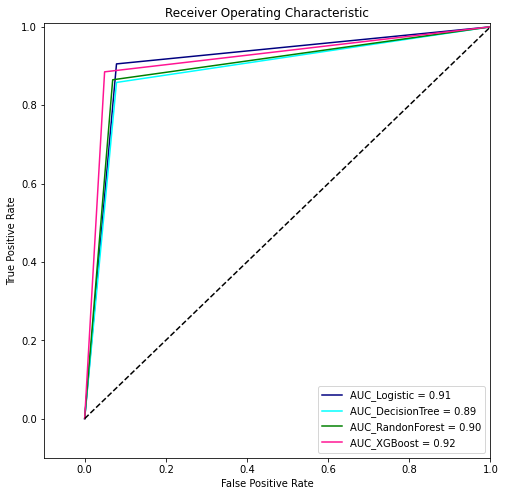

In [83]:

from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8,8))
#calculate fpr, tpr, threshold for all models
fpr_lr, tpr_lr,threshols_lr = roc_curve(y_test, y_pred_lr_ada)
fpr_dt, tpr_dt,threshols_dt = roc_curve(y_test, y_pred_dt_adasyn)
fpr_rf, tpr_rf,threshols_rf = roc_curve(y_test, y_pred_test_rf_ada)
fpr_xgb, tpr_xgb,threshols_xgb = roc_curve(y_test, y_pred_xgb_ada)

#calculate AUC-ROC score for all models
roc_auc_lr= auc(fpr_lr,tpr_lr)
roc_auc_dt= auc(fpr_dt,tpr_dt)
roc_auc_rf= auc(fpr_rf,tpr_rf)
roc_auc_xgb= auc(fpr_xgb,tpr_xgb)

# plot ruc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'navy',label='AUC_Logistic = %0.2f'% roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, 'aqua',label='AUC_DecisionTree = %0.2f'% roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'g',label='AUC_RandonForest = %0.2f'% roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, 'deeppink',label='AUC_XGBoost = %0.2f'% roc_auc_xgb)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on the ROC-AUC curve , XGBoost is performing better.

CONFUSION MATRIX FOR THE BEST MODEL (XGBOOST):

Text(0.5, 15.0, 'Predicted label')

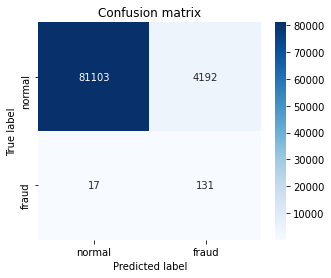

In [84]:
plt.rcParams['figure.figsize'] = [5,4]

cm=confusion_matrix(y_test,y_pred_xgb_ada)
df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Top var = 14
2nd Top var = 4
3rd Top var = 8


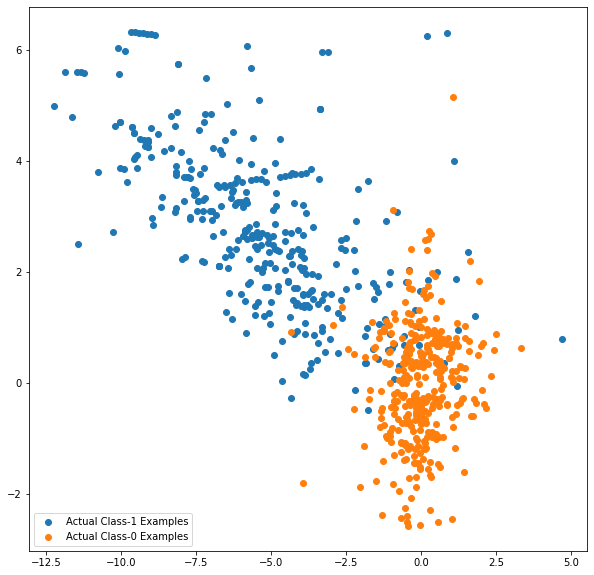

In [85]:
var_imp = []
for i in xgb_model_ada.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model_ada.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model_ada.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model_ada.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model_ada.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model_ada.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# **From all the above observations, we can conclude that XGBoost with SMOTE technique gives us the Best performance.**
# **AUC-ROC score: 93%**
# **Second Best Model would be Logistic Regression with SMOTE**

## **Predicting the probability for train data (XGBoost with SMOTE):**

In [86]:
y_pred_prob = xgb_model_smote.predict_proba(X_train_smote)[:,1]
#new data frame for actual and predicted values.
y_train_pred_final = pd.DataFrame({'Actual_churn_label':y_train_smote, 'Churn_Prob_pred':y_pred_prob})
y_train_pred_final.head()


,Actual_churn_label,Churn_Prob_pred
0,0,0.013136
1,0,0.087739
2,0,0.052121
3,0,0.009582
4,0,0.008834


## **Predicting the probability for test data (XGBoost with SMOTE):**

In [87]:
y_pred_prob_test = xgb_model_smote.predict_proba(X_test.values)[:,1]
#new dataframe for actuals and predicted.
y_test_pred_final = pd.DataFrame({'Actual_churn_label':y_test.values, 'Churn_Prob_pred':y_pred_prob_test})
y_test_pred_final.head()


,Actual_churn_label,Churn_Prob_pred
0,0,0.017589
1,0,0.063807
2,0,0.245139
3,0,0.066713
4,0,0.098116


# **Plotting the ROC curve:**

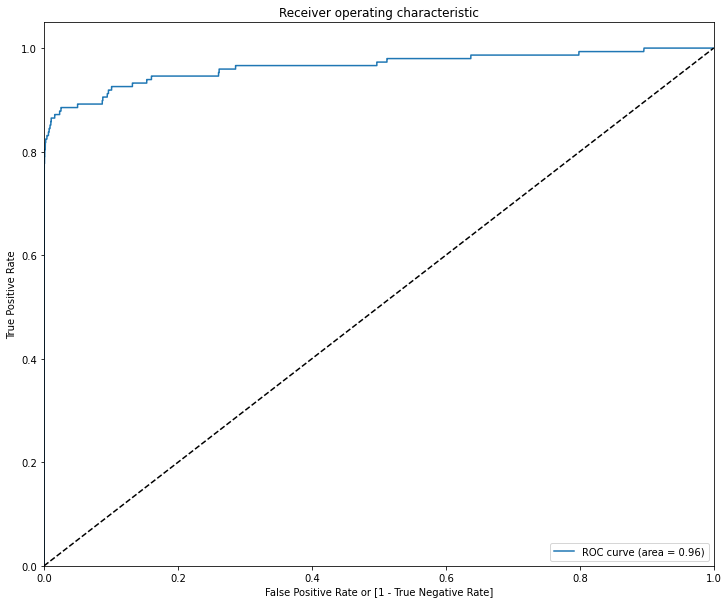

In [88]:
#Defining the function for plotting the ROC curve
from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = roc_curve(y_test_pred_final.Actual_churn_label, y_test_pred_final.Churn_Prob_pred, drop_intermediate=False )

#PLotting the ROC curve
plt.figure(figsize=(12, 10))
draw_roc(y_test_pred_final.Actual_churn_label, y_test_pred_final.Churn_Prob_pred)

In [89]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_pred_train_smote))
fpr, tpr, thresholds = roc_curve(y_test_pred_final.Actual_churn_label, y_test_pred_final.Churn_Prob_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Threshold =', threshold)


Train auc = 0.9452467088734801
Threshold = 0.4138


# **Using the Threshold value to predict the labels:**

In [90]:
y_test_pred_final['final_predicted'] = y_test_pred_final['Churn_Prob_pred'].map( lambda x: 1 if x >= threshold else 0)

y_test_pred_final.head()

,Actual_churn_label,Churn_Prob_pred,final_predicted
0,0,0.017589,0
1,0,0.063807,0
2,0,0.245139,0
3,0,0.066713,0
4,0,0.098116,0


## **PRECISION _RECALL CURVE**

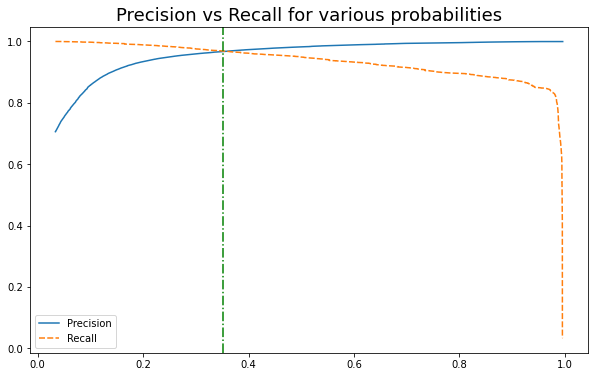

In [93]:

# Probability Distribution of Precision-Recall Trade-off
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_churn_label, y_train_pred_final.Churn_Prob_pred)

cutoff_df = pd.DataFrame({'Precision': pd.Series(p[:-1], index=thresholds),
              'Recall':pd.Series(r[:-1], index=thresholds)})
cutoff_df.head()
#Plotting the trade-off
plt.figure(figsize=(10, 6))
sns.lineplot(data=cutoff_df)
plt.title('Precision vs Recall for various probabilities', fontsize=18)
plt.axvline(0.352, color='g', linestyle='-.')

### ***Precision -Recall threshold value: 0.35***

In [94]:
# predictions on test subset

y_pred_xgb_smote = xgb_model_smote.predict(X_test.values)

In [95]:
# computing confusion matrix
cm=confusion_matrix(y_test, y_pred_xgb_smote)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
print(cm)

[[83848  1447]
 [   19   129]]


Text(0.5, 15.0, 'Predicted label')

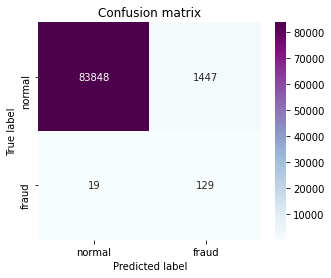

In [96]:
plt.rcParams['figure.figsize'] = [5,4]

cm=confusion_matrix(y_test,y_pred_xgb_smote)
df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
sns.heatmap(df_cm,annot=True,cmap='BuPu',fmt='g')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# **CONCLUSIONS:**
1. Our final model (XGBoost with SMOTE) has performed well to identify the frauds correctly.[Recall : 87% and AUC-ROC :93%]
2. Tuning parameters of resampled model with cross validation can possibly improve our model.
3. ADASYN might be a suitable choice too. 
4. Out of 148 fraud transaction in test, Our Model is able to correctly identify 129 samples and missed 19 samples.
5. By using this OverSampling techniques , We have succesfully decreased the False Negatives. 